In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
import os
# print(os.path.exists('/content/drive/MyDrive/Colab-Notebooks/covidDataset'))
datapath = "../../../../datasets/covidDataset"
# datapath = '/content/drive/MyDrive/Colab-Notebooks/covidDataset'
print(os.path.exists(datapath))

True


In [4]:
import tensorflow as tf

In [7]:
# #if set_memory_growth is enabled, the runtime initialization will not allocate all memory on the device. 
# #Memory growth cannot be configured on a PhysicalDevice with virtual devices configured.
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#     # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)


In [5]:
import pathlib

def get_imagepath_and_labels(datapath):
    data_root = pathlib.Path(datapath)
    all_image_path = [str(path) for path in list(data_root.glob('*/*'))]

    label_names = sorted(item.name for item in data_root.glob('*/*'))

    all_image_label = [pathlib.Path(single_image_path).parent.name for single_image_path in all_image_path]

    return all_image_path, all_image_label

all_image_path, all_image_label = get_imagepath_and_labels(datapath)

In [6]:
import numpy as np

def get_images_and_labels_astensor(image_path, image_labels, target_size, channels):
    '''
    target_size is to resize the image.
    '''
    images = []
    labels = []
    for i in range(0, len(image_path)):
        image = image_astensor(image_path[i], target_size, channels=channels)
        images.append(image)
        labels.append(image_labels[i])
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

def image_astensor(image_path, target_size, channels):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_png(image, channels=channels)
        image = tf.image.resize(image, target_size)
        image = tf.cast(image, tf.float32 )
        image = image / 255
        return image

images, labels = get_images_and_labels_astensor(all_image_path, all_image_label, (224, 224), channels=3)

print(images.shape)
print(labels.shape)

(2481, 224, 224, 3)
(2481,)


In [7]:
# images = (tf.convert_to_tensor(images))
# labels = (tf.convert_to_tensor(labels))
print(images.shape)
print(labels.shape)

(2481, 224, 224, 3)
(2481,)


In [8]:
print(np.unique(labels, return_counts=True))
# def unique_counts(labels):
#     y,_,count = tf.unique_with_counts(labels)
#     print("labels-{0} and counts-{1}".format(y, count)) 
# unique_counts(labels)

(array(['COVID', 'non-COVID'], dtype='<U9'), array([1252, 1229]))


In [9]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    images, 
    labels, 
    test_size=400, 
    shuffle=True,
    random_state=42,
    stratify=labels
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2081, 224, 224, 3)
(2081,)
(400, 224, 224, 3)
(400,)


In [10]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array(['COVID', 'non-COVID'], dtype='<U9'), array([1050, 1031]))
(array(['COVID', 'non-COVID'], dtype='<U9'), array([202, 198]))


In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, 
    y_train, 
    test_size=200, 
    shuffle=True,
    random_state=42,
    stratify=y_train
)

# y_valid = np.expand_dims(y_valid, axis=1)
# y_train = np.expand_dims(y_train, axis=1)
# y_test = np.expand_dims(y_test, axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(1881, 224, 224, 3)
(1881,)
(400, 224, 224, 3)
(400,)
(200, 224, 224, 3)
(200,)


In [12]:
X_train, X_train2, y_train, y_train2 = train_test_split(
    X_train, 
    y_train, 
    test_size=600, 
    shuffle=True,
    random_state=42,
    stratify= y_train
)
print(X_train.shape)
print(y_train.shape)
print(X_train2.shape)
print(y_train2.shape)

(1281, 224, 224, 3)
(1281,)
(600, 224, 224, 3)
(600,)


In [13]:
X_train, X_train3, y_train, y_train3 = train_test_split(
    X_train, 
    y_train, 
    test_size=600, 
    shuffle=True,
    random_state=42,
    stratify = y_train
)
print(X_train.shape)
print(y_train.shape)
print(X_train3.shape)
print(y_train3.shape)

(681, 224, 224, 3)
(681,)
(600, 224, 224, 3)
(600,)


In [14]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train2, return_counts=True))
print(np.unique(y_train3, return_counts=True))
print(np.unique(y_valid, return_counts=True))
print(np.unique(y_test, return_counts=True)) 

(array(['COVID', 'non-COVID'], dtype='<U9'), array([343, 338]))
(array(['COVID', 'non-COVID'], dtype='<U9'), array([303, 297]))
(array(['COVID', 'non-COVID'], dtype='<U9'), array([303, 297]))
(array(['COVID', 'non-COVID'], dtype='<U9'), array([101,  99]))
(array(['COVID', 'non-COVID'], dtype='<U9'), array([202, 198]))


In [15]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.preprocessing import LabelEncoder
# prepare target

def prepare_targets(y_train, y_train2, y_train3, y_test, y_valid):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_train2_enc = le.transform(y_train2)
    y_train3_enc = le.transform(y_train3)
    y_test_enc = le.transform(y_test)
    y_valid_enc = le.transform(y_valid)
    return y_train_enc, y_train2_enc, y_train3_enc, y_test_enc, y_valid_enc

y_train_enc, y_train2_enc, y_train3_enc, y_test_enc, y_valid_enc = prepare_targets(y_train, y_train2, y_train3, y_test, y_valid)

In [17]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train_enc, 2)
y_train2_cat = to_categorical(y_train2_enc, 2)
y_train3_cat = to_categorical(y_train3_enc, 2)
y_test_cat = to_categorical(y_test_enc, 2)
y_valid_cat = to_categorical(y_valid_enc, 2)

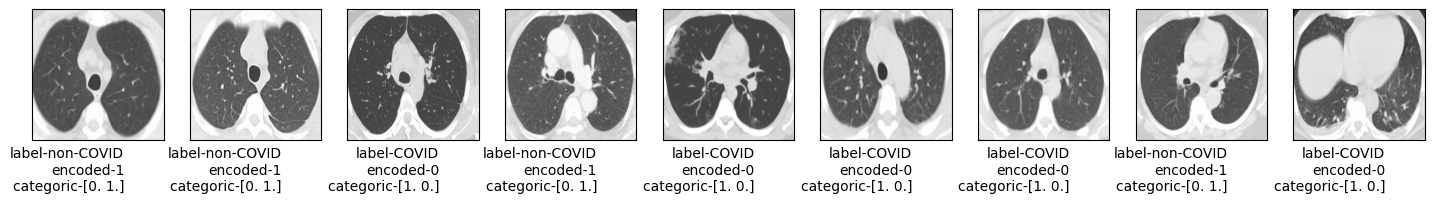

In [16]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))

for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[i])
    ax.text(0.7, -0.4, "label-{0}\nencoded-{1}\ncategoric-{2}".format(y_train[i], y_train_enc[i], y_train_cat[i]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, fontsize=10)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
# converting the data to tf.tensor
X_train = tf.convert_to_tensor(X_train)
X_train2 = tf.convert_to_tensor(X_train2)
X_train3 = tf.convert_to_tensor(X_train3)
X_test = tf.convert_to_tensor(X_test)
X_valid = tf.convert_to_tensor(X_valid)
y_train_enc = tf.convert_to_tensor(y_train_enc)
y_train2_enc= tf.convert_to_tensor(y_train2_enc)
y_train3_enc= tf.convert_to_tensor(y_train3_enc)
y_test_enc = tf.convert_to_tensor(y_test_enc)
y_valid_enc = tf.convert_to_tensor(y_valid_enc)
y_train_cat = tf.convert_to_tensor(y_train_cat)
y_train2_cat = tf.convert_to_tensor(y_train2_cat)
y_train3_cat = tf.convert_to_tensor(y_train3_cat)
y_test_cat = tf.convert_to_tensor(y_test_cat)
y_valid_cat = tf.convert_to_tensor(y_valid_cat)

Plotting implementation

In [19]:
import matplotlib.pyplot as plt
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

Model Implementation

Loading vgg19 and adding layers

In [24]:
vgg_model = tf.keras.applications.VGG19(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3))
# vgg_model.summary()
vgg_model.trainable=False 

x = vgg_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(500, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
vgg_output = tf.keras.layers.Dense(2, activation='softmax')(x)

vgg = tf.keras.models.Model(vgg_model.input, vgg_output)
vgg._name='vgg19'
vgg.summary()

80150528/80134624 [==============================] - 273s 3us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [25]:
model_checkpoint_path = 'models/test5/vgg'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)
# model_earlystopping_callback = tf.keras.callbacks.EarlyStopping(
#                                                     monitor='val_loss',
#                                                     patience = 5,
#                                                     mode='min')

In [26]:
vgg.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

vgg_history = vgg.fit(X_train2, y_train2_cat,
                    epochs=20,
                    batch_size = 16,
                    validation_data=(X_valid, y_valid_cat),
                     callbacks = [model_checkpoint_callback])
# vgg.save("models/test/5")

Epoch 1/20
38/38 [==============================] - 92s 2s/step - loss: 3.2043 - binary_accuracy: 0.5283 - val_loss: 0.9928 - val_binary_accuracy: 0.5050
Epoch 2/20
38/38 [==============================] - 65s 2s/step - loss: 1.2132 - binary_accuracy: 0.5350 - val_loss: 0.6513 - val_binary_accuracy: 0.7000
Epoch 3/20
38/38 [==============================] - 63s 2s/step - loss: 0.7698 - binary_accuracy: 0.6017 - val_loss: 0.6326 - val_binary_accuracy: 0.6950
Epoch 4/20
38/38 [==============================] - 61s 2s/step - loss: 0.6136 - binary_accuracy: 0.6833 - val_loss: 0.5465 - val_binary_accuracy: 0.7300
Epoch 5/20
38/38 [==============================] - 63s 2s/step - loss: 0.5266 - binary_accuracy: 0.7417 - val_loss: 0.4750 - val_binary_accuracy: 0.8050
Epoch 6/20
38/38 [==============================] - 61s 2s/step - loss: 0.4762 - binary_accuracy: 0.7683 - val_loss: 0.4638 - val_binary_accuracy: 0.7300
Epoch 7/20
38/38 [==============================] - 61s 2s/step - loss: 0.42

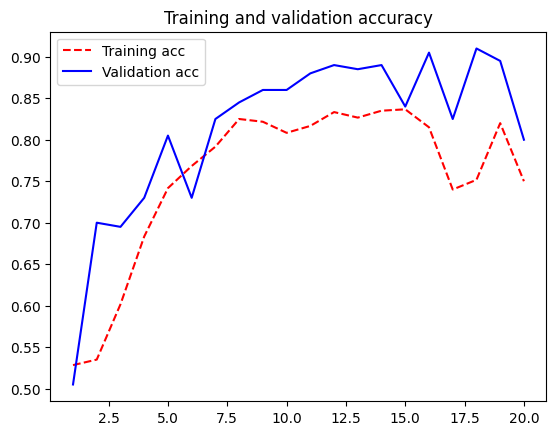

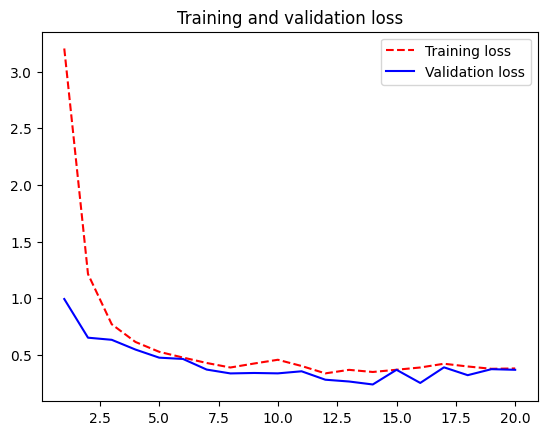

In [27]:
plot_accuracy_and_loss(vgg_history)

Part 2 - DenseNet 169 

In [18]:
dense169_model = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
# dense169_model.summary()
dense169_model.trainable=False 

y = dense169_model.layers[-1].output
y = tf.keras.layers.Flatten()(y)
y = tf.keras.layers.Dropout(0.5)(y)
y = tf.keras.layers.Dense(1000, activation='relu')(y)
y = tf.keras.layers.Dropout(0.5)(y)
densenet_1_output = tf.keras.layers.Dense(2, activation='softmax')(y)

densenet_1 = tf.keras.models.Model(dense169_model.input, densenet_1_output)
densenet_1._name='densenet_1'
densenet_1.summary()

Model: "densenet_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                         

 conv5_block4_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 768)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
          

In [19]:
model_checkpoint_path = 'models/test5/densenet-1000'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [20]:
densenet_1.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_1_history = densenet_1.fit(X_train, y_train_cat,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_valid, y_valid_cat),
                   callbacks = model_checkpoint_callback)

Epoch 1/30
22/22 [==============================] - 277s 12s/step - loss: 12.0752 - binary_accuracy: 0.6843 - val_loss: 2.9430 - val_binary_accuracy: 0.7850
Epoch 2/30
22/22 [==============================] - 179s 8s/step - loss: 2.4296 - binary_accuracy: 0.8267 - val_loss: 1.1844 - val_binary_accuracy: 0.8600
Epoch 3/30
22/22 [==============================] - 163s 8s/step - loss: 0.6380 - binary_accuracy: 0.9031 - val_loss: 0.3986 - val_binary_accuracy: 0.9050
Epoch 4/30
22/22 [==============================] - 155s 7s/step - loss: 0.2306 - binary_accuracy: 0.9280 - val_loss: 0.3567 - val_binary_accuracy: 0.8900
Epoch 5/30
22/22 [==============================] - 45s 2s/step - loss: 0.2175 - binary_accuracy: 0.9369 - val_loss: 0.3595 - val_binary_accuracy: 0.8800
Epoch 6/30
22/22 [==============================] - 157s 7s/step - loss: 0.1273 - binary_accuracy: 0.9574 - val_loss: 0.3325 - val_binary_accuracy: 0.9200
Epoch 7/30
22/22 [==============================] - 149s 7s/step - lo

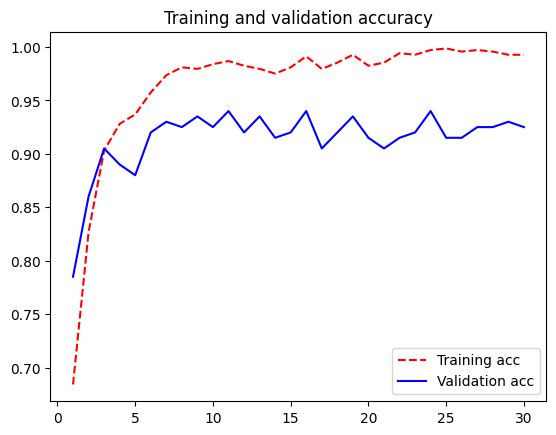

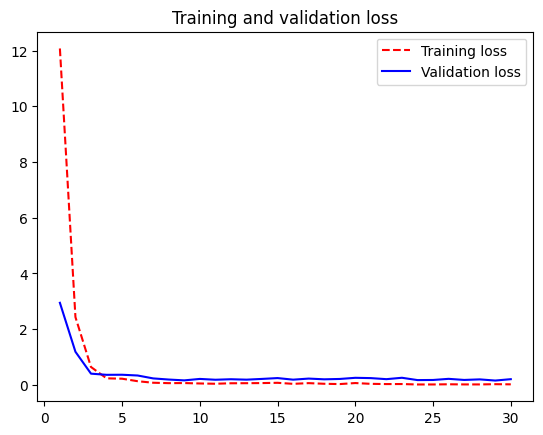

In [21]:
plot_accuracy_and_loss(densenet_1_history)

Part 3 - Densenet 169

In [20]:
dense169_model2 = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
# dense169_model.summary()
dense169_model2.trainable=False 
# since the model is already loaded we load in again
z = dense169_model2.layers[-1].output
z = tf.keras.layers.Flatten()(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(1000, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(500, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(200, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
densenet_2_output = tf.keras.layers.Dense(2, activation='softmax')(z)

densenet_2 = tf.keras.models.Model(dense169_model2.input, densenet_2_output)
densenet_2._name='densenet_2'
densenet_2.summary()

Model: "densenet_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                         

                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 7, 7, 704)   2816        ['conv5_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_0_relu (Activatio  (None, 7, 7, 704)   0           ['conv5_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 7, 7, 128)    90112       ['conv5_block3_0_relu[0][0]']    
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block3_1_conv[0][0]']    
 ization) 

In [21]:
model_checkpoint_path = 'models/test5/densenet-1000-500-200'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [22]:
densenet_2.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_2_history = densenet_2.fit(X_train3, y_train3_cat,
                    epochs=30,
                    batch_size = 32,
                    validation_data=(X_valid, y_valid_cat),
                    callbacks = model_checkpoint_callback )


Epoch 1/30
19/19 [==============================] - 237s 11s/step - loss: 10.3119 - binary_accuracy: 0.5583 - val_loss: 1.2628 - val_binary_accuracy: 0.6900
Epoch 2/30
19/19 [==============================] - 229s 12s/step - loss: 6.0634 - binary_accuracy: 0.5783 - val_loss: 0.5768 - val_binary_accuracy: 0.7500
Epoch 3/30
19/19 [==============================] - 202s 11s/step - loss: 2.4562 - binary_accuracy: 0.6267 - val_loss: 0.5162 - val_binary_accuracy: 0.7400
Epoch 4/30
19/19 [==============================] - 177s 10s/step - loss: 1.1837 - binary_accuracy: 0.7050 - val_loss: 0.3701 - val_binary_accuracy: 0.8250
Epoch 5/30
19/19 [==============================] - 40s 2s/step - loss: 0.7038 - binary_accuracy: 0.7583 - val_loss: 0.3768 - val_binary_accuracy: 0.8350
Epoch 6/30
19/19 [==============================] - 254s 14s/step - loss: 0.5225 - binary_accuracy: 0.8017 - val_loss: 0.3394 - val_binary_accuracy: 0.8500
Epoch 7/30
19/19 [==============================] - 276s 15s/step

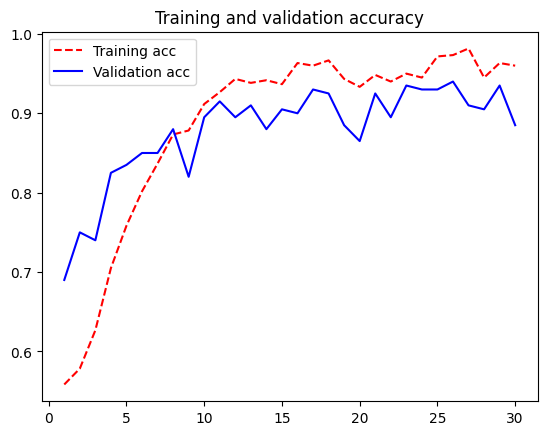

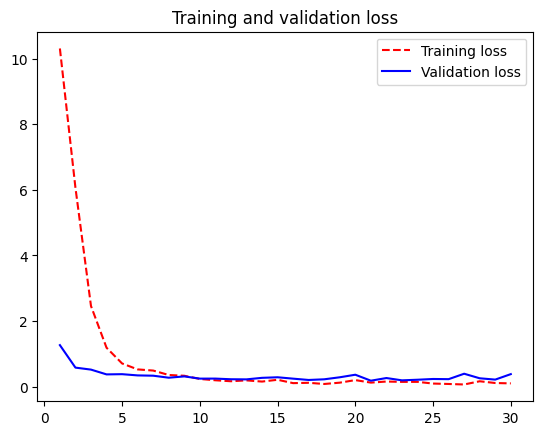

In [23]:
plot_accuracy_and_loss(densenet_2_history)

Ensembling all the models

In [ ]:
vgg = tf.keras.models.load_model('models/test5/vgg')
densenet_1 = tf.keras.models.load_model('models/test5/densenet-1000')
densenet_2 = tf.keras.models.load_model('models/test5/densenet-1000-500-200')

In [ ]:
vgg.trainable = False
densenet_1.trainable = False
densenet_2.trainable = False
models = [vgg, densenet_1, densenet_2]
# to avoid conflicts with naming
for layer in models[0].layers:
    layer._name = layer.name + str('_0')
for layer in models[1].layers:
    layer._name = layer.name + str('_1')
for layer in models[2].layers:
    layer._name = layer.name + str('_2')

In [ ]:
average = tf.keras.layers.Average()([vgg.output, densenet_1.output, densenet_2.output])
dense = tf.keras.layers.Dense(1, activation='sigmoid')(average)

ensemble = tf.keras.Model([vgg.input, densenet_1.input, densenet_2.input], dense)

In [ ]:
ensemble.summary()

In [ ]:
# from keras.utils.vis_utils import plot_model

In [ ]:
# plot_model(ensembled, to_file = 'new_model.png', dpi=50)

In [ ]:
ensemble.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [ ]:
model_checkpoint_path = 'models/test4/ensemble'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
ensemble_history = ensemble.fit([X_train, X_train, X_train],y_train_enc,
                                epochs=20,
                                validation_data=([X_valid, X_valid, X_valid], y_valid_enc),
                                batch_size = 1,
                                callbacks=model_checkpoint_callback)

In [ ]:
plot_accuracy_and_loss(ensembled_history)

In [ ]:
test_loss, test_acc = ensemble.evaluate([X_test, X_test, X_test],  y_test_enc)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

let's do some evauation

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score ,precision_score,accuracy_score, f1_score,roc_auc_score

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result

In [ ]:
y_pred = ensemble.predict([X_test[:10], X_test[:10], X_test[:10]])